In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def age_buckets(age):
    if (age < 27):
        return 'Gen-Z'
    elif (age >= 27) and (age <= 42):
        return 'Millennial'
    elif (age>=43) and (age <= 48):
        return 'Gen X'
    elif (age>=59) and (age <= 68):
        return 'Boomer II'
    elif (age>=59) and (age <= 77):
        return 'Boomer I'
    else:
        return 'Post War'   


In [13]:
df1 = pd.read_excel('content/Nov2022_Voters_1of3.xlsx')
df2 = pd.read_excel('content/Nov2022_Voters_2of3.xlsx')
df3 = pd.read_excel('content/Nov2022_Voters_3of3.xlsx')

nov_2022_voters = pd.concat([df1,df2,df3])
nov_2022_voters.sample(5)

,Voter ID,VOTE_TYPE,CITY,ZIP,SEX,DATE_VOTED,BIRTHYEAR,Voting Site,Voting Precinct,Congressional House District,...,School District,School District Postion/Seat District,Municipality,Municipality District,Utility District,Management District,Community College District,Harris County SCHOOL TRUSTEE District,Community College Position District,Metro District
273128,1.176641e+09,E,HOUSTON,77096,M,2022-11-08,1954,72044,869,CONGRESSIONAL DIST 09,...,HOUSTON ISD,HOUSTON ISD POSITION 5,HOUSTON; CITY OF,HOUSTON COUNCIL DISTRICT K,NaN,NaN,HOUSTON COMMUNITY COLLEGE,HC SCHOOL TRUSTEE POS 2,HOUSTON COMM COL DIST 9,METROPOLITAN TRANSIT AUTHORITY
150778,1.178041e+09,P,HOUSTON,77009,M,2022-11-04,1979,SRD145M,3,CONGRESSIONAL DIST 18,...,HOUSTON ISD,HOUSTON ISD POSITION 1,HOUSTON; CITY OF,HOUSTON COUNCIL DISTRICT H,NaN,NaN,HOUSTON COMMUNITY COLLEGE,HC SCHOOL TRUSTEE POS 6,HOUSTON COMM COL DIST 8,METROPOLITAN TRANSIT AUTHORITY
368551,2.149882e+09,E,DEER PARK,77536,M,2022-11-08,1989,51017,470,CONGRESSIONAL DIST 36,...,DEER PARK ISD,NaN,DEER PARK; CITY OF,NaN,NaN,NaN,SAN JACINTO COLLEGE DISTRICT,HC SCHOOL TRUSTEE POS 1,NaN,NaN
405846,2.136790e+09,P,HOUSTON,77062,F,2022-10-29,1999,SRD129U,699,CONGRESSIONAL DIST 36,...,CLEAR CREEK ISD,CLEAR CREEK ISD POS 3,HOUSTON; CITY OF,HOUSTON COUNCIL DISTRICT E,CLEAR LAKE CITY WA,NaN,NaN,HC SCHOOL TRUSTEE POS 1,NaN,METROPOLITAN TRANSIT AUTHORITY
26595,1.112492e+09,P,HOUSTON,77027,F,2022-10-25,1947,SRD134W,178,CONGRESSIONAL DIST 38,...,HOUSTON ISD,HOUSTON ISD POSITION 7,HOUSTON; CITY OF,HOUSTON COUNCIL DISTRICT G,NaN,NaN,HOUSTON COMMUNITY COLLEGE,HC SCHOOL TRUSTEE POS 2,HOUSTON COMM COL DIST 5,METROPOLITAN TRANSIT AUTHORITY


In [11]:
df1 = pd.read_csv('content/AllRegistered_Harris_1of3.csv')
df2 = pd.read_csv('content/AllRegistered_Harris_2of3.csv')
df3 = pd.read_csv('content/AllRegistered_Harris_3of3.csv')

all_voters = pd.concat([df1,df2,df3])
all_voters.sample(5)

,Status,Voter ID,Precinct,City,Zip,Effective Date
92071,Active,1171748245,479,HOUSTON,77070,8/19/2010
200838,Active,2163860950,180,HOUSTON,77021,3/3/2020
843476,Active,1110346434,349,WEBSTER,77598,1/1/2002
521319,Active,1214039090,39,HOUSTON,77006,5/26/2016
726838,Active,1166123132,655,FRIENDSWOOD,77546,8/7/2009


In [14]:
print('[+] Number of Votes Cast in November: ', nov_2022_voters.shape[0])
print('[/] Number of Registered Voters: ', all_voters.shape[0])
print('[=] Voter Turn out as a percentage', (nov_2022_voters.shape[0] / all_voters.shape[0]) * 100)


[+] Number of Votes Cast in November:  1107401
[/] Number of Registered Voters:  2538176
[=] Voter Turn out as a percentage 43.62979556973197


In [15]:
nov_2022_voters.columns

Index(['Voter ID', 'VOTE_TYPE', 'CITY', 'ZIP', 'SEX', 'DATE_VOTED',
       'BIRTHYEAR', 'Voting Site', 'Voting Precinct',
       'Congressional House District', 'State Senate District',
       'State Representative District', 'County Commissioner District',
       'State Board of Education District',
       'Just of the Peace/Constable District', 'School District',
       'School District Postion/Seat District', 'Municipality',
       'Municipality District', 'Utility District', 'Management District',
       'Community College District', 'Harris County SCHOOL TRUSTEE District',
       'Community College Position District', 'Metro  District'],
      dtype='object')

In [16]:
"""
Voter Turnout (Top 5) and (Bottom 5):
    Distribution by  City, Zip, Sex, Age (BIRTHYEAR)
Voters who didnt Turnout:
    Distribution by  City, Zip, Sex, Age (BIRTHYEAR)
"""

'\nVoter Turnout (Top 5) and (Bottom 5):\n    Distribution by  City, Zip, Sex, Age (BIRTHYEAR)\nVoters who didnt Turnout:\n    Distribution by  City, Zip, Sex, Age (BIRTHYEAR)\n'

In [17]:
def top_counter(df, group_col):
    xx = df[group_col].value_counts(normalize=True)
    percent = xx / xx.sum()
    fmt = '{:.1%}'.format
    return pd.DataFrame({'percentage': percent.map(fmt)}).reset_index().head(5)

def bottom_counter(df, group_col):
    xx = df[group_col].value_counts(normalize=True)
    percent = xx / xx.sum()
    fmt = '{:.1%}'.format
    return pd.DataFrame({'percentage': percent.map(fmt)}).reset_index().tail(5)


### General Turnout

In [18]:
top_counter(nov_2022_voters, 'CITY')

,index,percentage
0,HOUSTON,61.4%
1,SPRING,6.9%
2,CYPRESS,6.1%
3,KATY,5.1%
4,HUMBLE,4.0%


In [160]:
bottom_counter(nov_2022_voters, 'CITY')

,index,percentage
26,***,0.0%
27,MISSOURI CITY,0.0%
28,NEW CANEY,0.0%
29,HEMPSTEAD,0.0%
30,2088,0.0%


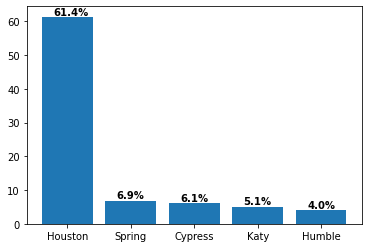

In [161]:
labels = ['Houston', 'Spring', 'Cypress', 'Katy', 'Humble']
percentages = [61.4, 6.9, 6.1, 5.1, 4.0]

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

In [19]:
top_counter(nov_2022_voters, 'VOTE_TYPE')

,index,percentage
0,P,62.5%
1,E,31.5%
2,M,5.4%
3,Z,0.4%
4,A,0.2%


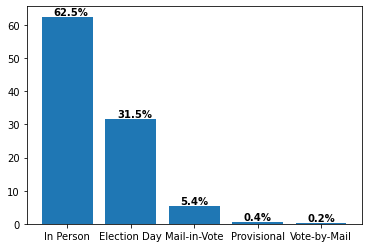

In [78]:
labels = ['In Person', 'Election Day', 'Mail-in-Vote', 'Provisional', 'Vote-by-Mail']
percentages = [62.5, 31.5, 5.4, 0.4, 0.2]

plt.bar(labels, percentages)
#plt.pie(percentages, labels=labels,autopct='%1.1f%%',explode = (0.1, 0, 0, 0, 0))
#plt.xticks(labels, rotation=90)
# for i, v in enumerate(percentages):
#     plt.text(i, v, str(v) + "%", color='black', va='bottom', fontweight='bold')
for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

In [95]:
table_1 = bottom_counter(nov_2022_voters, 'CITY')
table_1

,index,percentage
26,***,0.0%
27,MISSOURI CITY,0.0%
28,NEW CANEY,0.0%
29,HEMPSTEAD,0.0%
30,2088,0.0%


In [96]:
table_1 = table_1.drop([26,30], axis=0)
table_1

,index,percentage
27,MISSOURI CITY,0.0%
28,NEW CANEY,0.0%
29,HEMPSTEAD,0.0%


In [97]:
ZIP_top_graph = top_counter(nov_2022_voters, 'ZIP')
ZIP_top_graph

,index,percentage
0,77433,3.1%
1,77429,3.0%
2,77379,2.8%
3,77346,2.2%
4,77449,2.2%


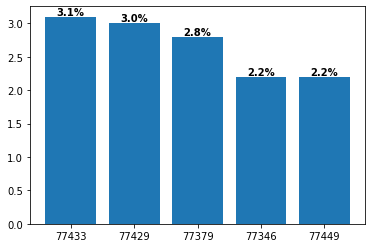

In [105]:
labels = ['77433', '77429', '77379', '77346', '77449']
percentages = [3.1, 3.0, 2.8, 2.2, 2.2]

# labels = ZIP_top_graph['index']
# percentages = ZIP_top_graph['percentage']

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

In [22]:
bottom_counter(nov_2022_voters, 'ZIP')

,index,percentage
145,77565,0.0%
146,77386,0.0%
147,77539,0.0%
148,HOUSTON,0.0%
149,77340,0.0%


In [23]:
top_counter(nov_2022_voters, 'SEX')

,index,percentage
0,F,55.0%
1,M,45.0%
2,0,0.0%
3,N,0.0%
4,1,0.0%


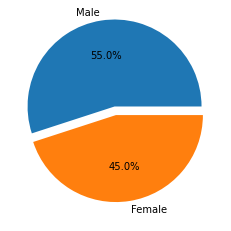

In [106]:
labels = ['Female', 'Male']
percentages = [55.0, 45.0]

plt.pie(percentages, labels=labels,autopct='%1.1f%%',explode = (0.1, 0))
plt.show()

In [24]:
from datetime import datetime

idx = nov_2022_voters['BIRTHYEAR'].apply(lambda x: True if type(x)==int else False)
age_segment = nov_2022_voters[idx]
age_segment = age_segment['BIRTHYEAR'].apply(lambda x: datetime.now().year - x)
age_segment = age_segment.apply(lambda x: age_buckets(x)).reset_index(drop=True).to_frame()
top_counter(age_segment, 'BIRTHYEAR')

,index,percentage
0,Post War,25.1%
1,Millennial,24.1%
2,Boomer II,19.6%
3,Boomer I,13.6%
4,Gen X,9.9%


In [25]:
bottom_counter(age_segment, 'BIRTHYEAR')

,index,percentage
1,Millennial,24.1%
2,Boomer II,19.6%
3,Boomer I,13.6%
4,Gen X,9.9%
5,Gen-Z,7.7%


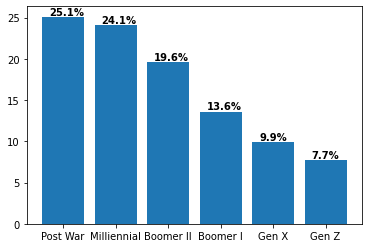

In [107]:
labels = ['Post War', 'Milliennial', 'Boomer II', 'Boomer I', 'Gen X', 'Gen Z']
percentages = [25.1, 24.1, 19.6, 13.6, 9.9, 7.7]

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

## Voters who did not turn out

In [168]:
holder = pd.merge(all_voters, nov_2022_voters, left_on='Voter ID', right_on='Voter ID', how='outer', indicator=True)


In [167]:
not_voted = holder[holder['_merge']=='left_only']

In [29]:
top_counter(not_voted, 'City')

,index,percentage
0,HOUSTON,65.1%
1,SPRING,5.5%
2,KATY,5.5%
3,CYPRESS,4.5%
4,HUMBLE,4.0%


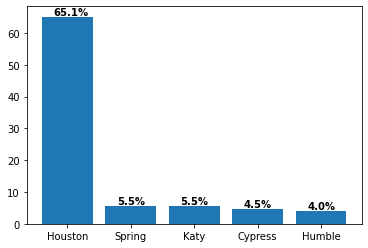

In [108]:
labels = ['Houston', 'Spring', 'Katy', 'Cypress', 'Humble']
percentages = [65.1, 5.5, 5.5, 4.5, 4.0]

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

In [30]:
bottom_counter(not_voted, 'City')

,index,percentage
23,STAFFORD,0.1%
24,WALLER,0.1%
25,PORTER,0.0%
26,MISSOURI CITY,0.0%
27,NEW CANEY,0.0%


In [31]:
top_counter(not_voted, 'Zip')

,index,percentage
0,77449.0,3.0%
1,77433.0,2.4%
2,77084.0,2.4%
3,77429.0,2.0%
4,77379.0,1.9%


In [163]:
bottom_counter(not_voted, 'Zip')

,index,percentage
137,77523.0,0.0%
138,77507.0,0.0%
139,77010.0,0.0%
140,77357.0,0.0%
141,77535.0,0.0%


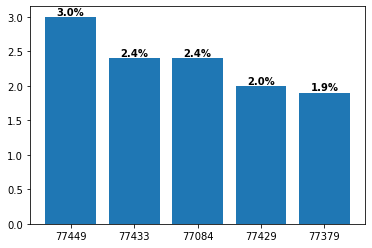

In [112]:
labels = ['77449', '77433', '77084', '77429', '77379']
percentages = [3.0, 2.4, 2.4, 2.0, 1.9]

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

## GOTV Contacted

In [34]:
contacted_voters = pd.read_excel('content/GOTV_TargetVoters.xlsx')
contacted_voters.head()

,Voter ID,City,Zip5,Age,Sex,PrecinctName
0,1122198569,Houston,77009,59,F,Harris - 0046
1,1114307920,Houston,77003,63,M,Harris - 0010
2,1186408232,Pasadena,77504,74,F,Harris - 0347
3,1161567574,Pasadena,77504,53,F,Harris - 0752
4,1068564056,Houston,77026,56,M,Harris - 0046


In [35]:
contacted_voters_age = contacted_voters['Age'].apply(lambda x: age_buckets(x)).reset_index(drop=True).to_frame()
top_counter(contacted_voters_age, 'Age')


,index,percentage
0,Millennial,32.7%
1,Gen-Z,22.6%
2,Post War,18.0%
3,Boomer II,11.5%
4,Gen X,8.6%


In [113]:
bottom_counter(contacted_voters_age, 'Age')

,index,percentage
1,Gen-Z,22.6%
2,Post War,18.0%
3,Boomer II,11.5%
4,Gen X,8.6%
5,Boomer I,6.5%


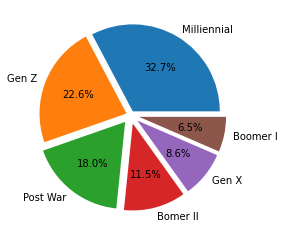

In [169]:
labels = ['Milliennial', 'Gen Z', 'Post War', 'Bomer II', 'Gen X', 'Boomer I']
percentages = [32.7, 22.6, 18.0, 11.5, 8.6, 6.5]

plt.pie(percentages, labels=labels,autopct='%1.1f%%',explode = (0.05, 0.05, 0.1, 0.1, 0.1, 0.1))
plt.show()

In [36]:
top_counter(contacted_voters, 'Sex')


,index,percentage
0,M,49.9%
1,F,49.9%
2,U,0.3%


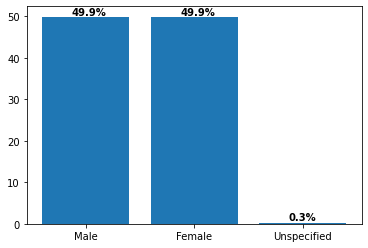

In [170]:
labels = ['Male', 'Female', 'Unspecified']
percentages = [49.9, 49.9, 0.3]

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

In [37]:
contacted_voters_who_voted = pd.merge(contacted_voters, nov_2022_voters, on='Voter ID', how='inner')
print('Contacted Voters', contacted_voters.shape[0])
print('Contacted Voters who voted', contacted_voters_who_voted.shape[0])
contacted_voters_who_voted.shape[0] / contacted_voters.shape[0]

Contacted Voters 22046
Contacted Voters who voted 3560


0.16148054068765308

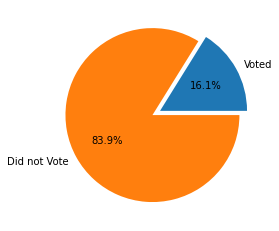

In [130]:
labels = ['Voted', 'Did not Vote']
percentages = [3560, 18486]

plt.pie(percentages, labels=labels,autopct='%1.1f%%',explode = (0.1, 0))
plt.show()

In [38]:
contacted_voters_who_voted_ = contacted_voters_who_voted['Age'].apply(lambda x: age_buckets(x)).reset_index(drop=True).to_frame()
top_counter(contacted_voters_who_voted_, 'Age')


,index,percentage
0,Millennial,32.7%
1,Gen-Z,26.0%
2,Post War,14.8%
3,Boomer II,11.4%
4,Boomer I,7.6%


In [131]:
bottom_counter(contacted_voters_who_voted_, 'Age')

,index,percentage
1,Gen-Z,26.0%
2,Post War,14.8%
3,Boomer II,11.4%
4,Boomer I,7.6%
5,Gen X,7.5%


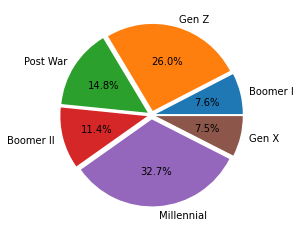

In [135]:
labels = ['Boomer I', 'Gen Z', 'Post War', 'Boomer II', 'Millennial', 'Gen X']
percentages = [7.6, 26.0, 14.8, 11.4, 32.7, 7.5]

plt.pie(percentages, labels=labels,autopct='%1.1f%%',explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.show()

In [39]:
top_counter(contacted_voters_who_voted, 'VOTE_TYPE')


,index,percentage
0,E,51.2%
1,P,45.6%
2,M,2.3%
3,Z,0.8%


In [136]:
bottom_counter(contacted_voters_who_voted, 'VOTE_TYPE')


,index,percentage
0,E,51.2%
1,P,45.6%
2,M,2.3%
3,Z,0.8%


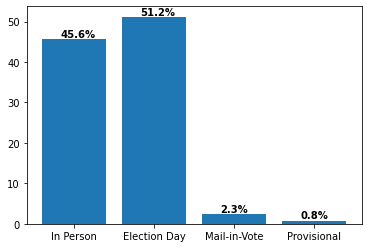

In [137]:
labels = ['In Person', 'Election Day', 'Mail-in-Vote', 'Provisional']
percentages = [45.6, 51.2, 2.3, 0.8]

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

## COST TABULATION

In [140]:

estimates = {
    'unit_cost' : {
        'Door' : 2,
        'Postcard': 0.35,
        'Text': 0.06,
        'Call': 0.13
    },
    'attempts' : {
        'Door' : 7010,
        'Postcard' : 37429,
        'Call' : 13031,
        'Text' : 18656,
    }
}

In [142]:
costs = pd.DataFrame(estimates).reset_index().rename({'index':'method'}, axis=1)
costs['total_costs'] = costs['unit_cost'] * costs['attempts']
# for i, v in enumerate(costs):
#     plt.annotate('$' + str(v) , 
#                  xy=(i, v), 
#                  xytext=(5,5), 
#                  textcoords='offset points',
#                  fontweight='bold')
costs

,method,unit_cost,attempts,total_costs
0,Door,2.00,7010,14020.00
1,Postcard,0.35,37429,13100.15
2,Text,0.06,18656,1119.36
3,Call,0.13,13031,1694.03


In [42]:
'Total Costs', costs['total_costs'].sum()

('Total Costs', 29933.54)

In [43]:
print('Cost per vote', costs['total_costs'].sum() / contacted_voters_who_voted.shape[0] )

Cost per vote 8.40829775280899


What are the demographic characteristics of precincts with a higher turnout rate?


The Age range of the voters from the top Precincts

In [146]:
top_precincts = top_counter(nov_2022_voters, 'Voting Precinct')
top_precincts = top_precincts['index'].to_list()

top_precints_data = nov_2022_voters[nov_2022_voters['Voting Precinct'].isin(top_precincts)]

idx = top_precints_data['BIRTHYEAR'].apply(lambda x: True if type(x)==int else False)
age_segment = top_precints_data[idx]
age_segment = age_segment['BIRTHYEAR'].apply(lambda x: datetime.now().year - x)
age_segment = age_segment.apply(lambda x: age_buckets(x)).reset_index(drop=True).to_frame()
top_counter(age_segment, 'BIRTHYEAR')

,index,percentage
0,Millennial,26.1%
1,Post War,25.1%
2,Boomer II,18.3%
3,Gen X,12.2%
4,Boomer I,12.1%


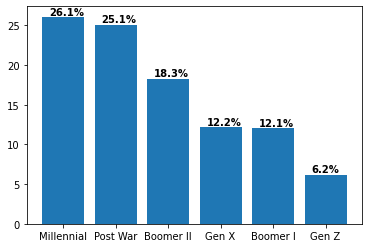

In [148]:
labels = ['Millennial', 'Post War', 'Boomer II', 'Gen X', 'Boomer I', 'Gen Z']
percentages = [26.1, 25.1, 18.3, 12.2, 12.1, 6.2]

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

The Age range of the voters from the bottom Precincts

In [150]:
bottom_precincts = bottom_counter(nov_2022_voters, 'Voting Precinct')
bottom_precincts = bottom_precincts['index'].to_list()

bottom_precints_data = nov_2022_voters[nov_2022_voters['Voting Precinct'].isin(bottom_precincts)]

idx = bottom_precints_data['BIRTHYEAR'].apply(lambda x: True if type(x)==int else False)
age_segment = bottom_precints_data[idx]
age_segment = age_segment['BIRTHYEAR'].apply(lambda x: datetime.now().year - x)
age_segment = age_segment.apply(lambda x: age_buckets(x)).reset_index(drop=True).to_frame()
top_counter(age_segment, 'BIRTHYEAR')

,index,percentage
0,Millennial,25.0%
1,Boomer II,25.0%
2,Boomer I,16.7%
3,Post War,16.7%
4,Gen-Z,16.7%


##  COME BACK LATER

In [ ]:
# labels = ['Millennial', 'Post War', 'Boomer II', 'Gen X', 'Boomer I', 'Gen Z']
# percentages = [25.0, 16.7, 25.0, 16.2, 16.7, 16.7]

# plt.bar(labels, percentages)

# for i, v in enumerate(percentages):
#     plt.annotate(str(v) + "%", 
#                  xy=(i, v), 
#                  xytext=(-14,2), 
#                  textcoords='offset points',
#                  fontweight='bold')
# plt.show()

In [46]:
top_precincts = top_counter(nov_2022_voters, 'Voting Precinct')
top_precincts = top_precincts['index'].to_list()

top_precints_data = nov_2022_voters[nov_2022_voters['Voting Precinct'].isin(top_precincts)]

top_counter(top_precints_data, 'VOTE_TYPE')

,index,percentage
0,P,68.4%
1,E,27.3%
2,M,3.8%
3,Z,0.4%
4,A,0.1%


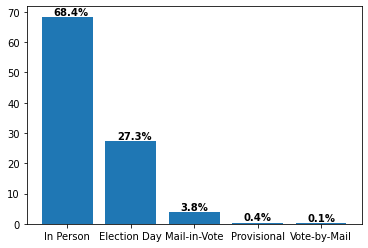

In [151]:
labels = ['In Person', 'Election Day', 'Mail-in-Vote', 'Provisional', 'Vote-by-Mail']
percentages = [68.4, 27.3, 3.8, 0.4, 0.1]

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()

## People WHo Did not vote

In [47]:
top_precincts = top_counter(not_voted, 'Precinct')
top_precincts = top_precincts['index'].to_list()

top_precints_data = not_voted[not_voted['Precinct'].isin(top_precincts)]
top_counter(top_precints_data, 'Zip')

,index,percentage
0,77083.0,20.9%
1,77072.0,19.6%
2,77449.0,19.2%
3,77042.0,15.6%
4,77041.0,14.2%


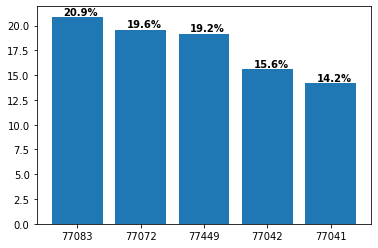

In [154]:
labels = ['77083', '77072', '77449', '77042', '77041']
percentages = [20.9, 19.6, 19.2, 15.6, 14.2]

plt.bar(labels, percentages)

for i, v in enumerate(percentages):
    plt.annotate(str(v) + "%", 
                 xy=(i, v), 
                 xytext=(-14,2), 
                 textcoords='offset points',
                 fontweight='bold')
plt.show()